In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
import dask.array as da

from cycspec_simulator import (
    Time,
    BasebandData,
    PolynomialPredictor,
    pspec_numba,
    guppi_raw,
)
from cycspec_simulator.scattering import ScintillationPattern

%matplotlib notebook

In [2]:
data = guppi_raw.read('B1937+21-true2chan-overlap.raw', use_dask=False)

In [3]:
predictor = PolynomialPredictor.from_file("polyco-B1937+21-60000.dat")

In [4]:
%time pspec = pspec_numba(data, 1024, 1024, predictor)

CPU times: user 2min 13s, sys: 545 ms, total: 2min 13s
Wall time: 2min 13s


<IPython.core.display.Javascript object>


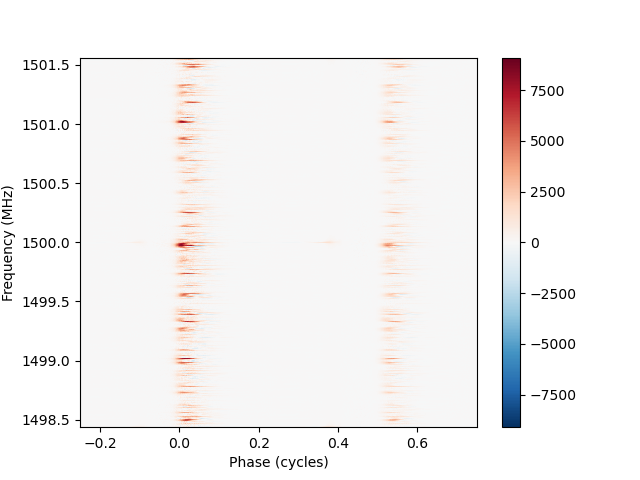

In [5]:
pc = pspec.plot(shift=0.25, cmap='RdBu_r', sym_lim=True)
plt.colorbar(pc)
plt.show()

In [6]:
np.savez('B1937+21-true2chan-pspec.npz',
         I=pspec.I, Q=pspec.Q, U=pspec.U, V=pspec.V,
         freq=pspec.freq, phase=pspec.phase)